## Observations and Insights 

1) There are more mice treated with Capomulin than other drug regimens. 

2) There are almost equal number of male and female mices being treated in this study. 

3) There is one potential outlier within the Infubinol regimen.

4) The tumor volume for a mouse treated with Capomulin appears to reduce over time. 

5) There is a strong correlation between mouse weight and average tumor volume for the Capomulin regimen. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df  = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data_df = pd.merge(mouse_metadata_df, study_results_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merge_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = len(merge_data_df["Mouse ID"].unique())
total_mice 

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
groupby_df = merge_data_df.groupby(["Mouse ID", "Timepoint"], as_index = False).count() 
duplicate_df = groupby_df.loc[groupby_df["Drug Regimen"] > 1]
duplicate_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
586,g989,0,2,2,2,2,2,2
587,g989,5,2,2,2,2,2,2
588,g989,10,2,2,2,2,2,2
589,g989,15,2,2,2,2,2,2
590,g989,20,2,2,2,2,2,2


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data_df.loc[merge_data_df['Mouse ID'] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
new_total = len(clean_df["Mouse ID"].unique())
new_total

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Extract columns from clean data
regimen_df = clean_df.loc[:, ["Drug Regimen","Tumor Volume (mm3)"]]  
regimen_df = regimen_df.set_index("Drug Regimen")

# Calculate mean of the tumor volume for each regimen
mean = regimen_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean() 

# Calculate median of the tumor volume for each regimen
median = regimen_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# Calculate variance of the tumor volume for each regimen
var = regimen_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# Calculate standard deviation of the tumor volume for each regimen
std = regimen_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Calculate SEM of the tumor volume for each regimen
sem = regimen_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Place all of the data found into a summary dataframe
summary_df = pd.DataFrame({"Tumor Volume Mean": mean,
                           "Tumor Volume Median": median,
                           "Tumor Volume Variance": var,
                           "Tumor Volume Std. Dev.": std,
                           "Tumor Volumne SEM": sem})
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volumne SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_two_df = regimen_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_two_df.columns = ["Tumor Volume Mean", "Tumor Volume Median", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volumne SEM"]
summary_two_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volumne SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

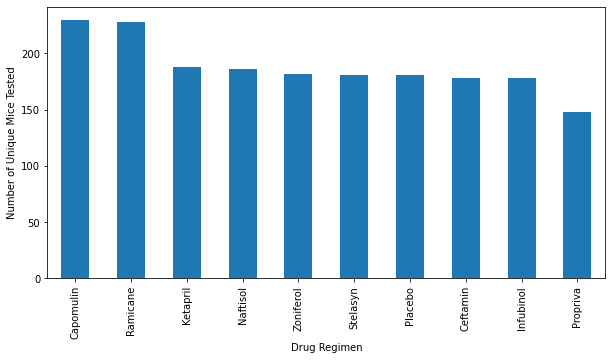

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Calculate total number of mice for each treatment 
tmt =  clean_df["Drug Regimen"].value_counts()

# Chart data and label the axes
tmt.plot(kind="bar", figsize=(10,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()
plt.tight_layout()

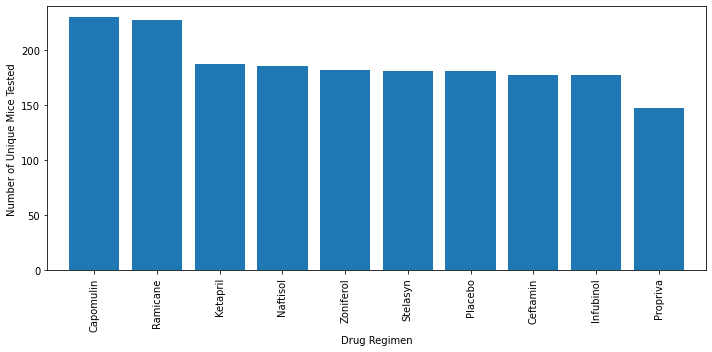

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Calculate total number of mice for each treatment 
drug_regimen = clean_df["Drug Regimen"].value_counts().index
total = clean_df["Drug Regimen"].value_counts().values

# Chart data and label the axes
x_axis = np.arange(len(total))

plt.figure(figsize=(10,5))

plt.bar(x_axis, total, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(total)+10)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.tight_layout()
plt.show()

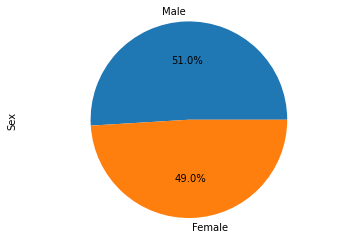

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Calculate total female and male mice  
sex = clean_df["Sex"].value_counts()

# Chart data and label the axes
sex.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.show()

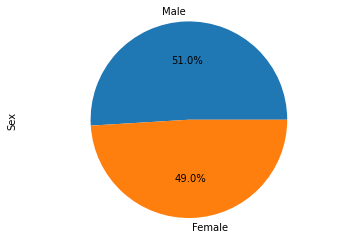

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate total female and male mice  
labels = clean_df["Sex"].value_counts().index
total = clean_df["Sex"].value_counts().values

# Chart data and label the axes
plt.pie(total, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(greatest_time, clean_df, how ="left", on=["Mouse ID","Timepoint"])

# Calculate the final tumor volume of each mouse for Capomulin
capomulin = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]

# Calculate the final tumor volume of each mouse for Ramicane
ramicane = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane"]

# Calculate the final tumor volume of each mouse for Infubinol
infubinol = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol"]

# Calculate the final tumor volume of each mouse for Ceftamin
ceftamin = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin"]

# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
final_df = pd.concat([capomulin, ramicane,infubinol, ceftamin])
final_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
223,x226,0,Ceftamin,Male,23,28,45.000000,0
228,x581,45,Ceftamin,Female,19,28,64.634949,3
231,x822,45,Ceftamin,Male,3,29,61.386660,3
238,y769,45,Ceftamin,Female,6,27,68.594745,4


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_df.loc[final_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile for {drug} is: {lowerq}")
    print(f"The upper quartile for {drug} is: {upperq}")
    print(f"The interquartile range for {drug} is: {iqr}")
    print(f"The the median for {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    outlier = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print (f"The outlier for {drug} is: {outlier}") 

The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
The the median for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The outlier for Capomulin is: Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile for Ramicane is: 31.56046955
The upper quartile for Ramicane is: 40.65900627
The interquartile range for Ramicane is: 9.098536719999998
The the median for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The outlier for Ramicane is: Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile for Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
The interquartile range for Infubinol is: 11.477135160000003
The the median for Infubinol is: 60.16518046 
Values below 36.83290494999999 

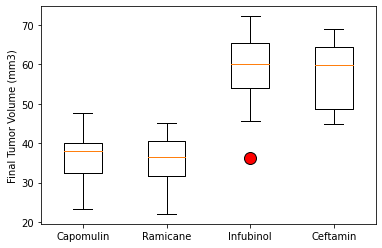

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=red_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

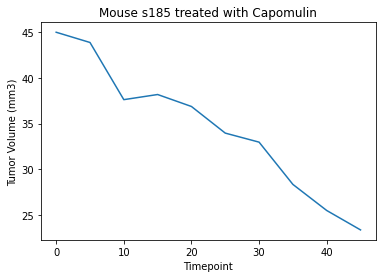

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]

s185_tp = s185_df["Timepoint"]
s185_tv = s185_df["Tumor Volume (mm3)"]

plt.plot(s185_tp, s185_tv)
plt.title("Mouse s185 treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

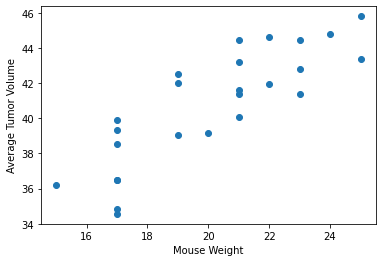

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_average = capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


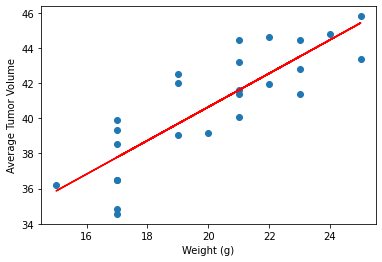

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
print(f'The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])[0],2)}')

# Calculate the linear regression model 
model = st.linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
linear_regression = capomulin_average['Weight (g)']*model[0]+model[1]

plt.scatter(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
plt.plot(capomulin_average["Weight (g)"], linear_regression, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()